In [3]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

%config InlineBackend.figure_format = 'retina'

# General fig dim and colors
fs = (20,10)
pal = 'CMRmap_r'

In [4]:
df = pd.read_csv('C:/Users/gptsorab/Downloads/preethi.n/irisflowerdataset.csv').drop('Id', axis=1)
display( df )

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
display( pd.DataFrame(df.Species.value_counts()) )

count
Species               
Iris-setosa         50
Iris-versicolor     50
Iris-virginica      50

In [7]:
df.describe().T.iloc[0:, 1:].style.background_gradient(cmap=pal)

In [22]:
pl.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=pal)
pl.show()

ValueError: could not convert string to float: 'Iris-setosa'

<Figure size 1000x800 with 0 Axes>

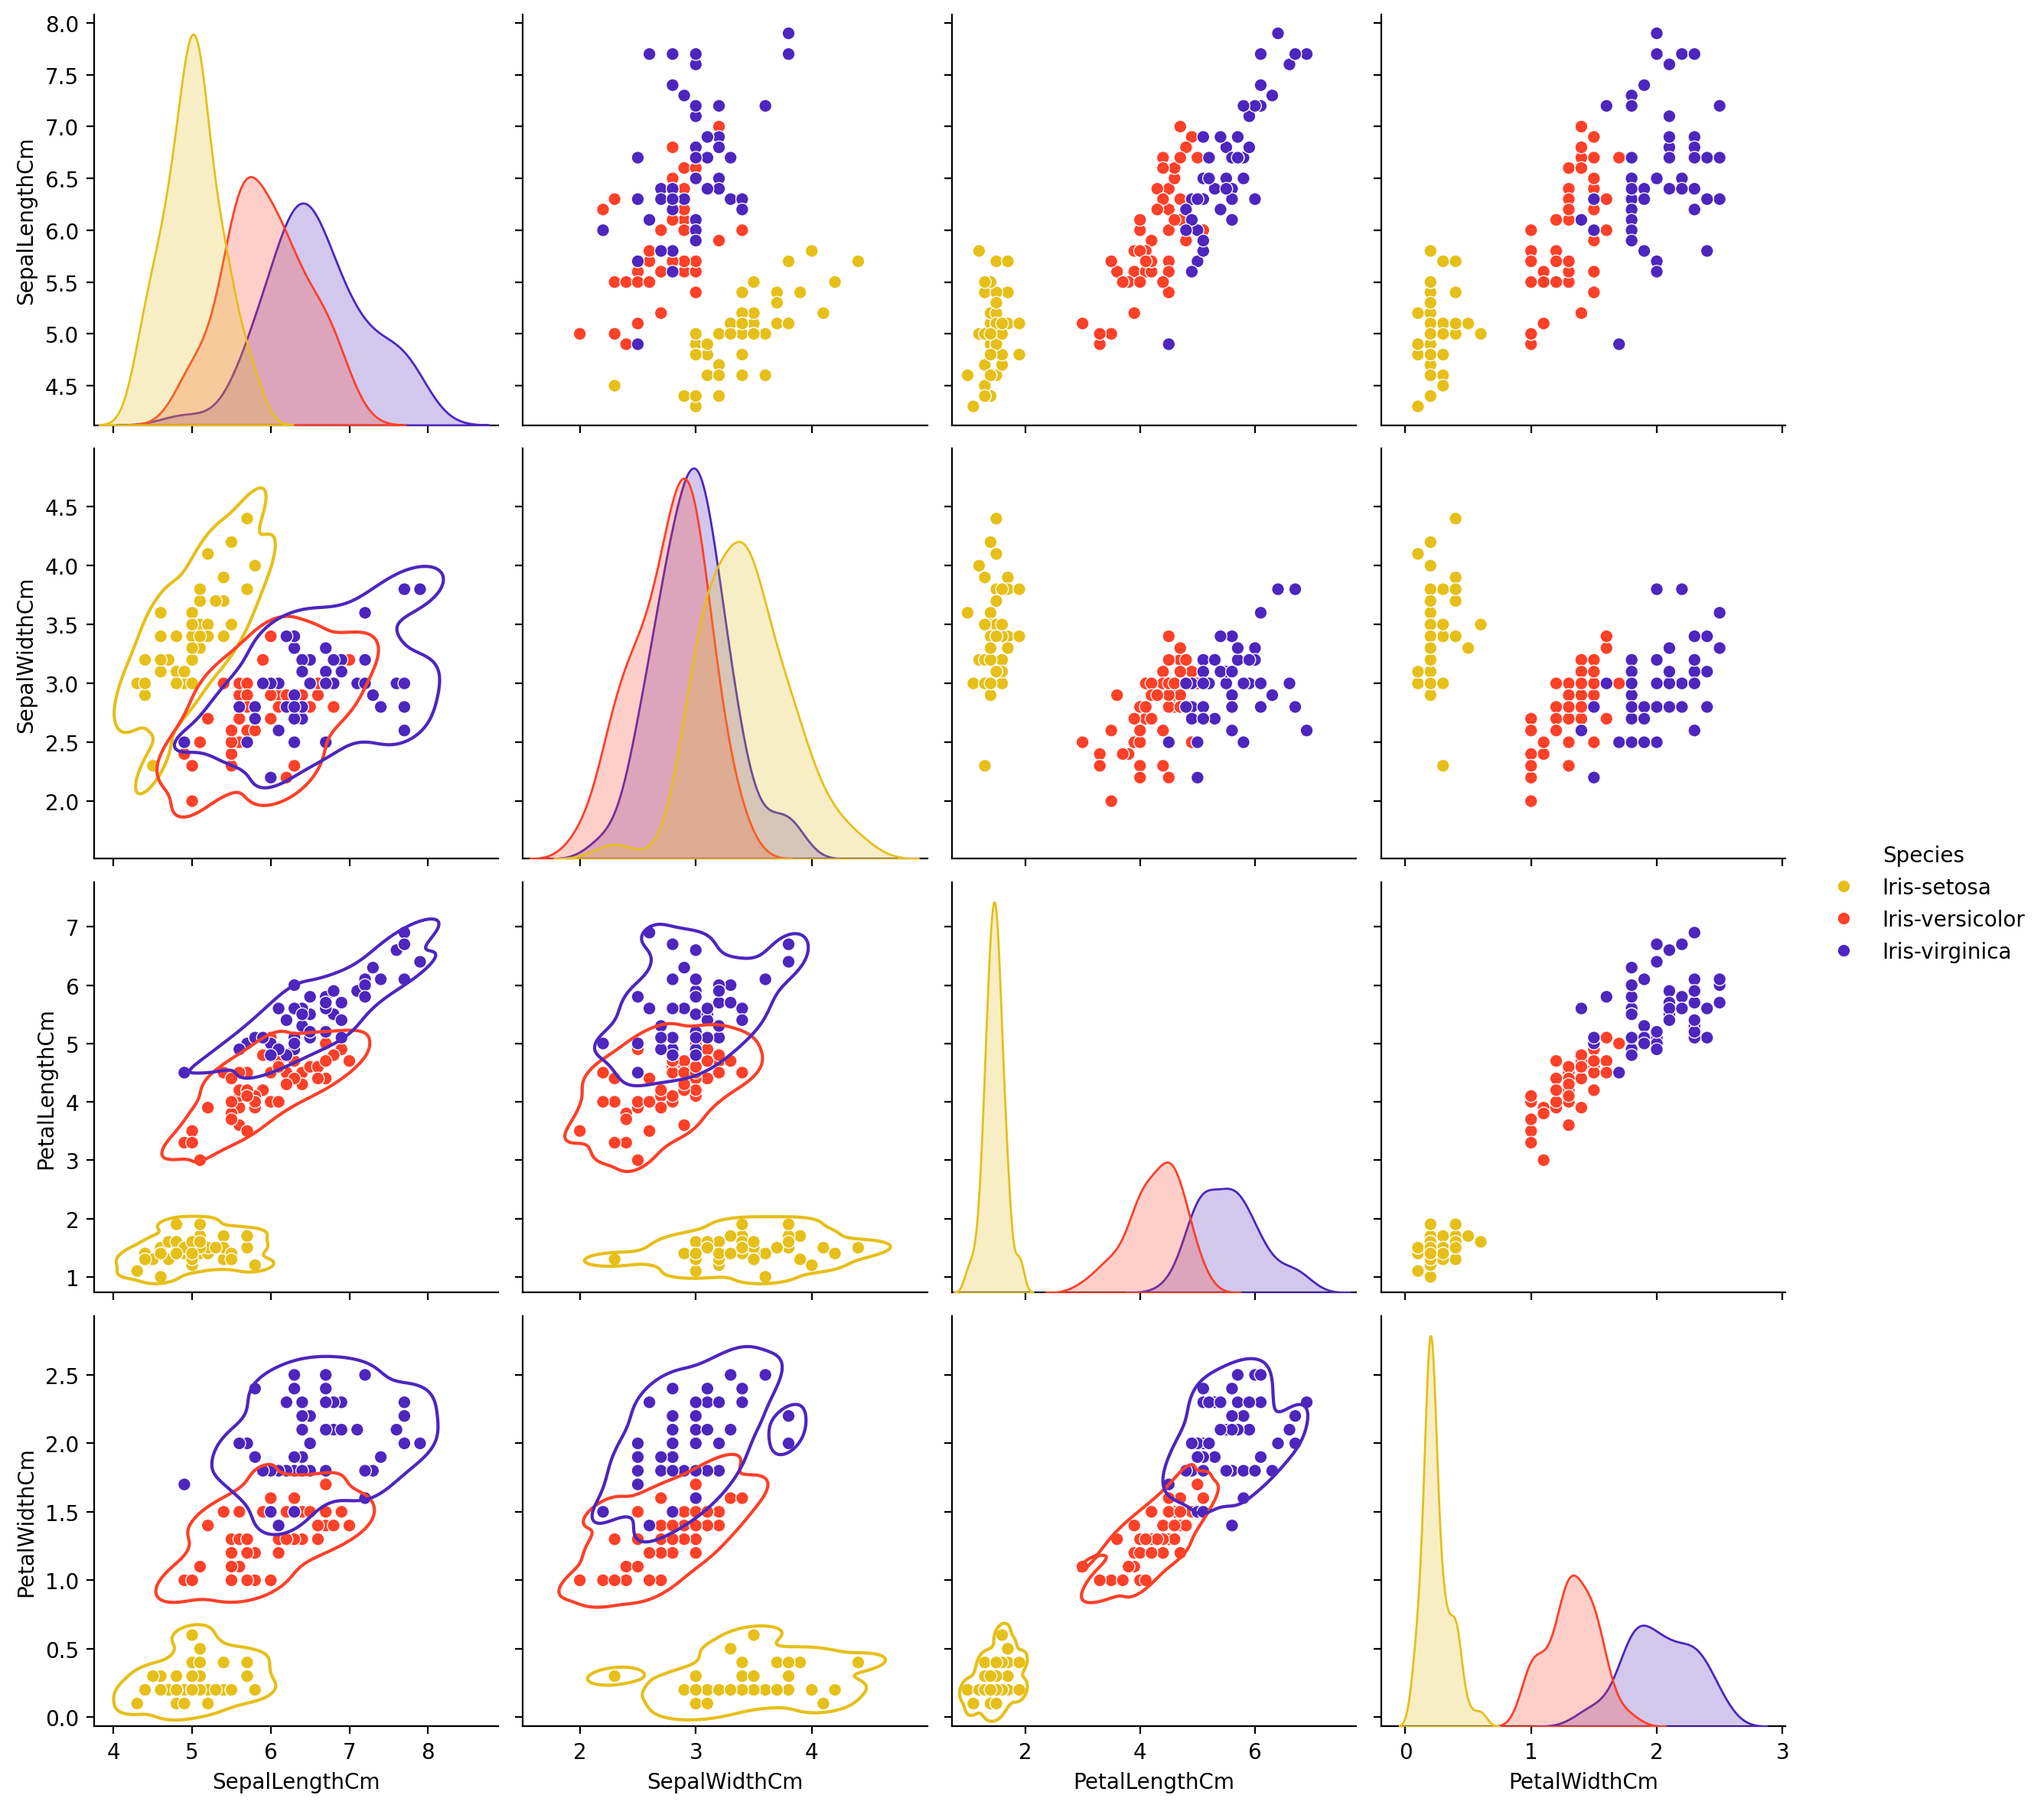

In [9]:
sns.pairplot(df, hue='Species', palette=pal, height=3).map_lower(sns.kdeplot, levels=2)
pl.show()

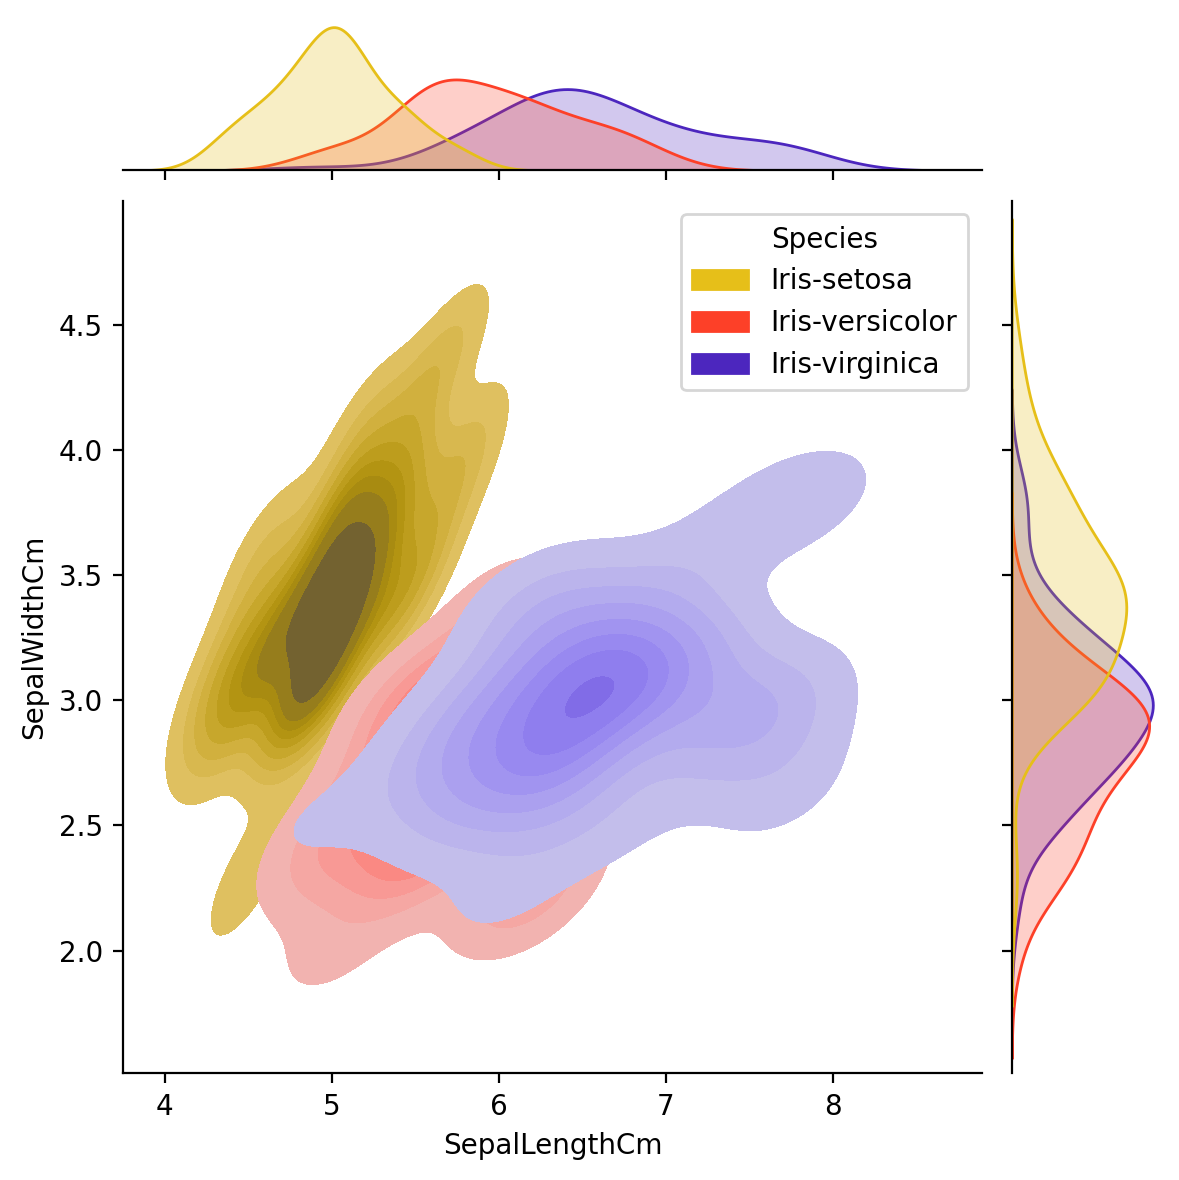

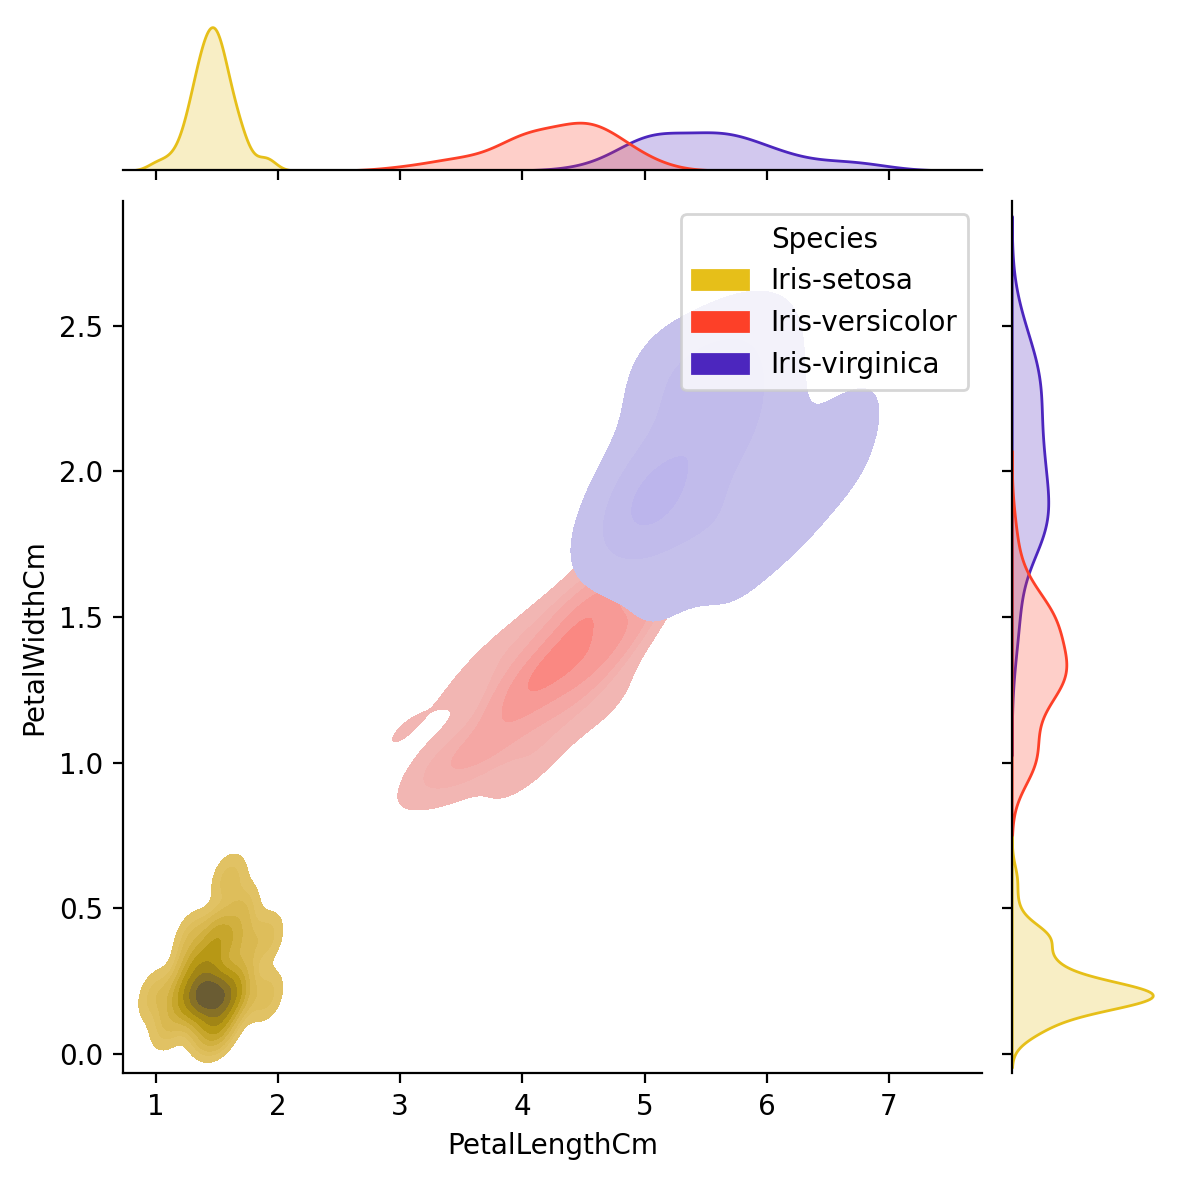

In [11]:
sns.jointplot(x='SepalLengthCm',
              y='SepalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

sns.jointplot(x='PetalLengthCm',
              y='PetalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

pl.show()

In [ ]:
!pip install dataprep
from dataprep.eda import create_report
create_report(df)

C:\Users\gptsorab\AppData\Local\Temp\ipykernel_7628\198838864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)
C:\Users\gptsorab\AppData\Local\Temp\ipykernel_7628\198838864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)
C:\Users\gptsorab\AppData\Local\Temp\ipykernel_7628\198838864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)
C:\Users\gptsorab\AppData\Local\Temp\ipykernel_76

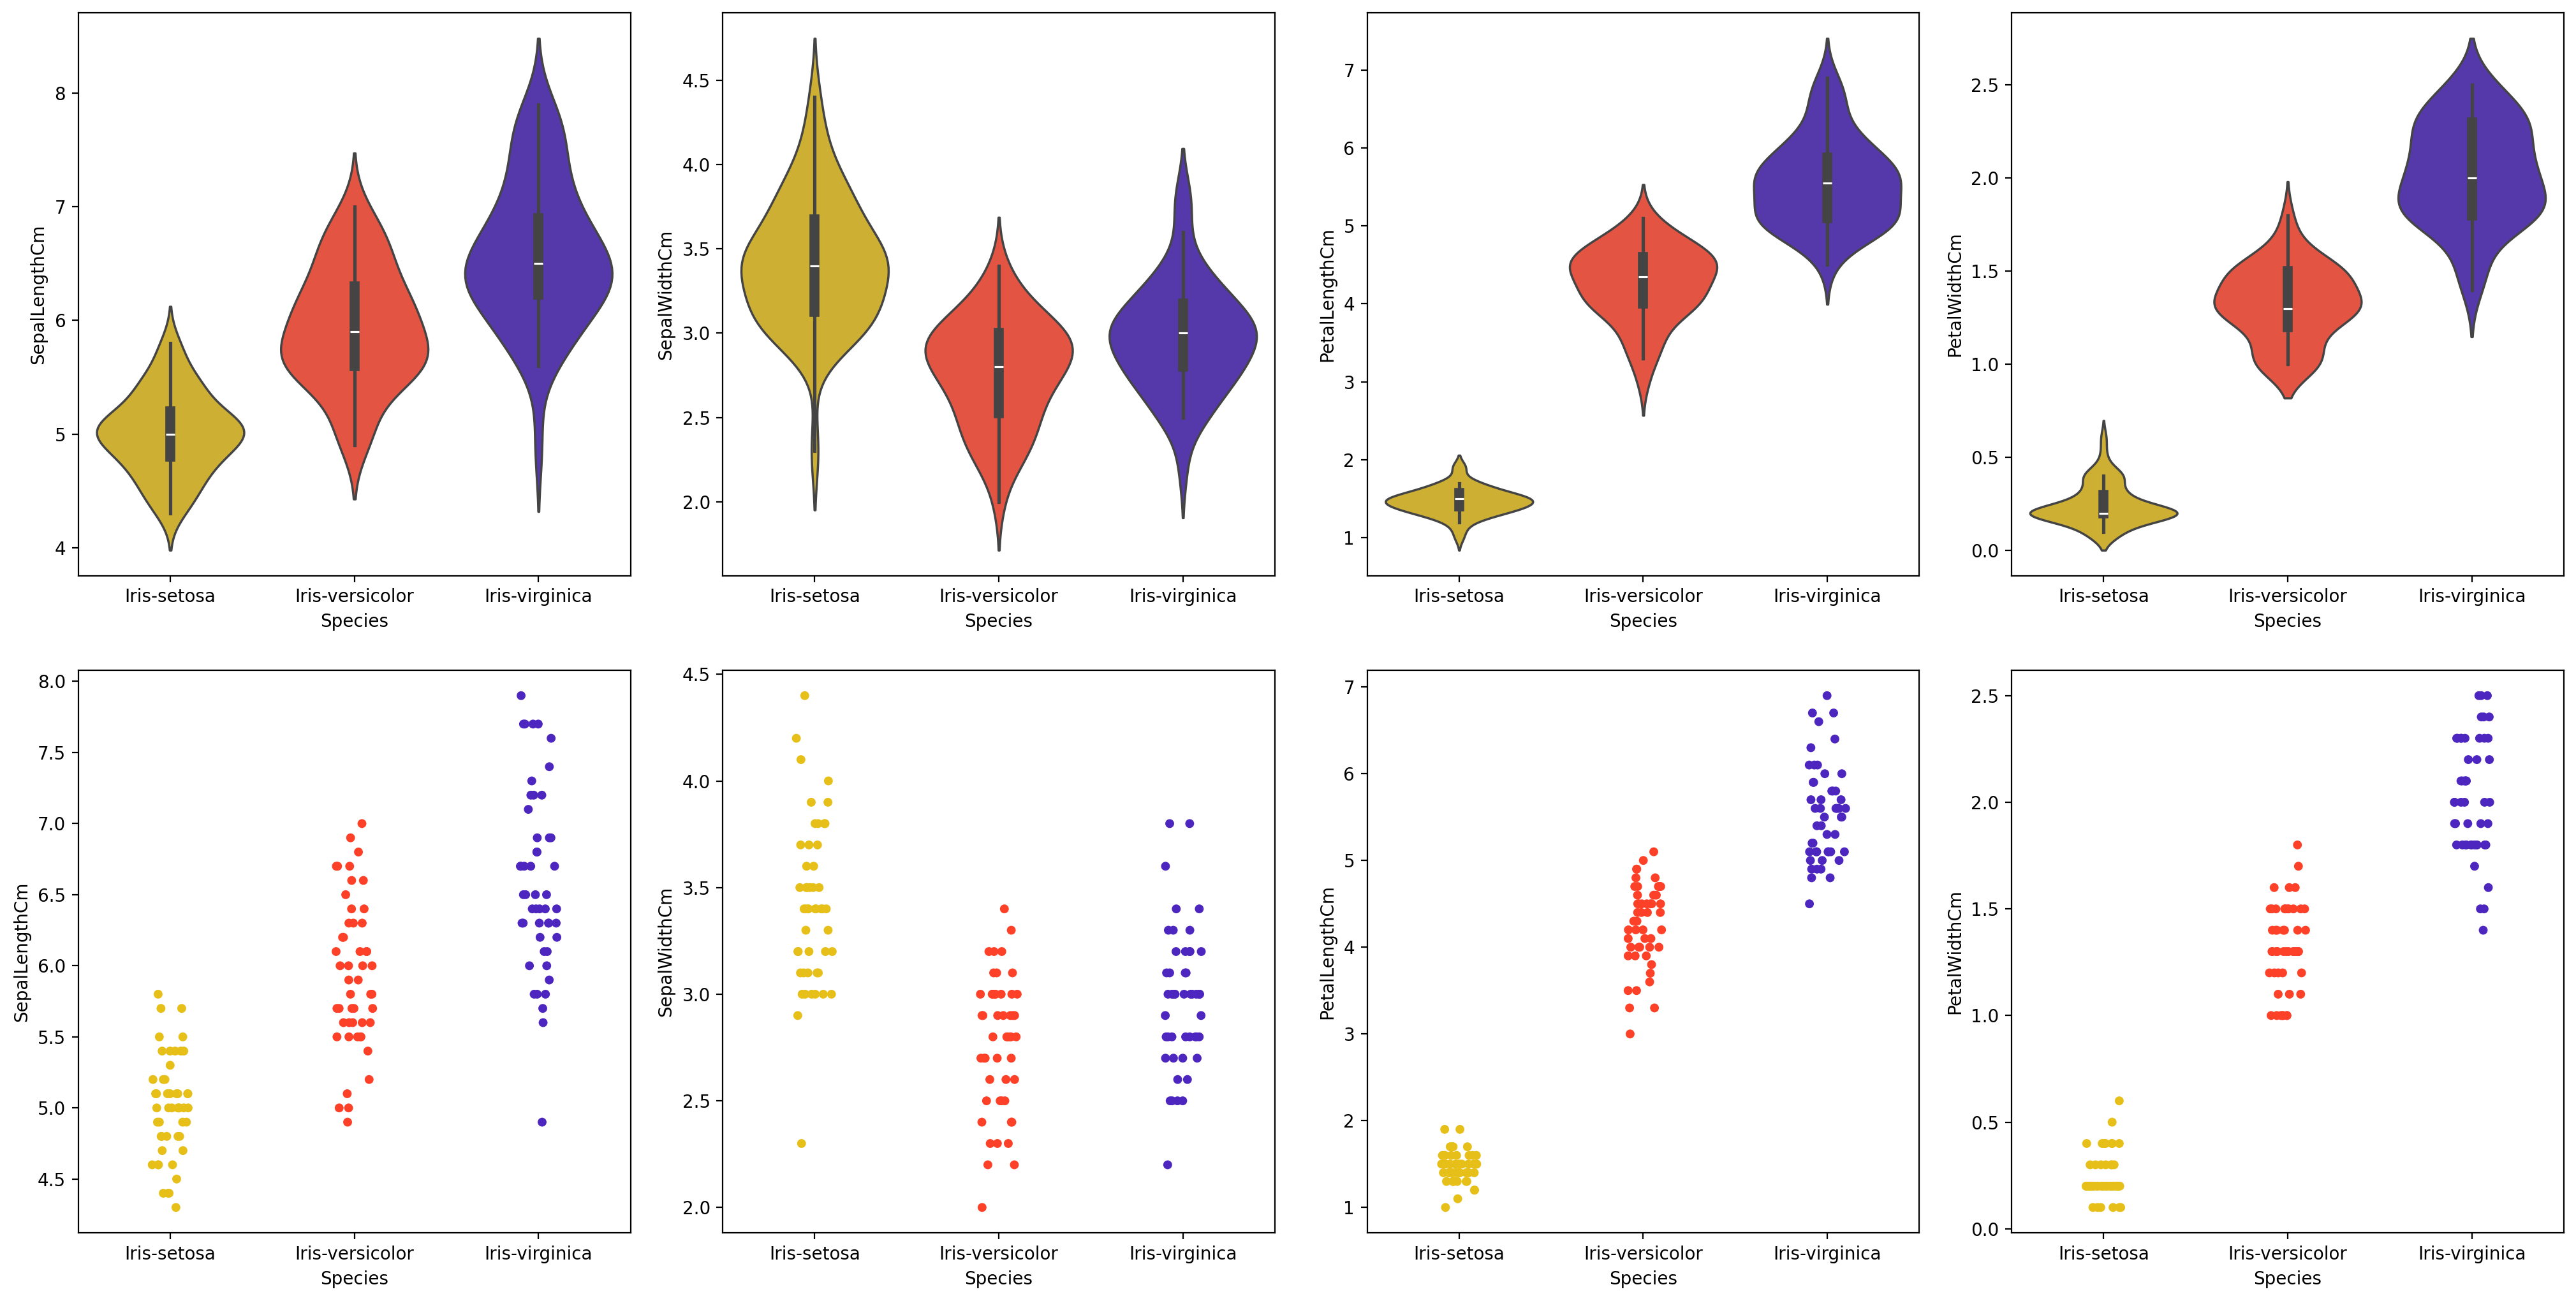

In [23]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Violin Plots
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)
    
# Strip Plots
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)
    
pl.tight_layout(pad=0, w_pad=1.5, h_pad=2)
pl.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gptsorab\AppData\Local\Temp\ipykernel_7628\287203909.py:11: SyntaxWarning: invalid escape sequence '\m'
  label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
C:\Users\gptsorab\AppData\Local\Temp\ipykernel_7628\287203909.py:11: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')


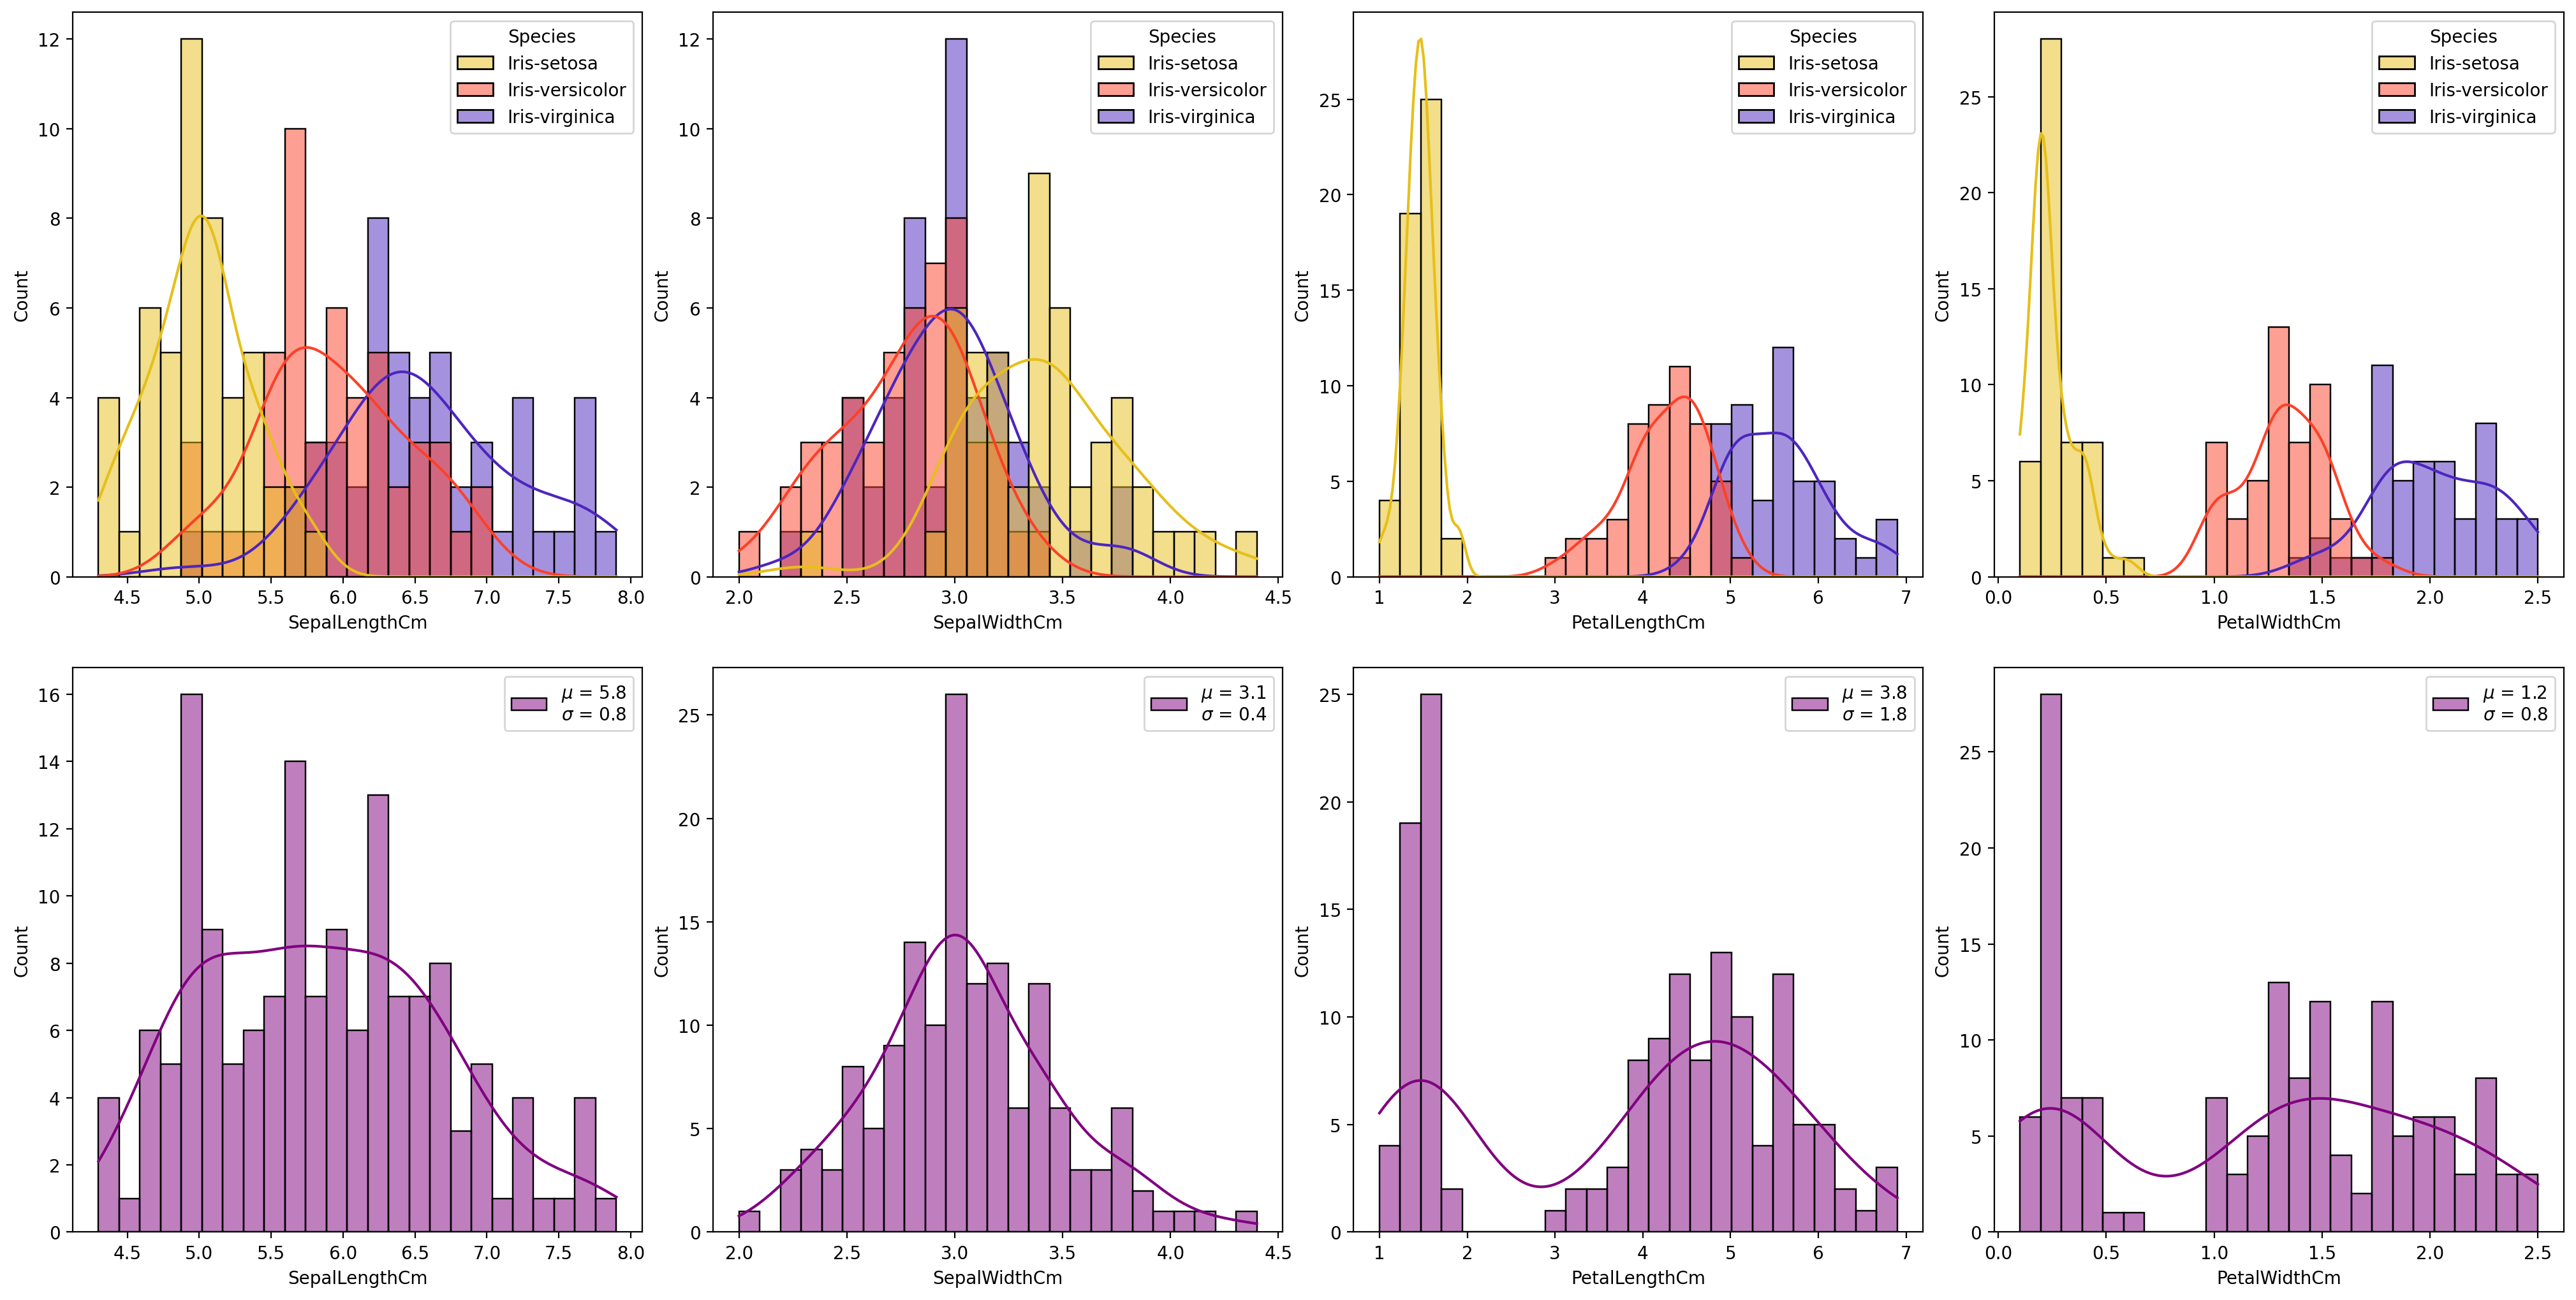

In [24]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Categorized Histograms
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, bins=25, hue='Species', palette=pal, ax=ax)

# Total Histograms
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    mu, sigma = norm.fit(df[col])
    sns.histplot(data=df, x=col, kde=True, bins=25, color='purple', ax=ax,
                 label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
    ax.legend()
    
pl.tight_layout(pad=0, w_pad=0, h_pad=2)
pl.show()

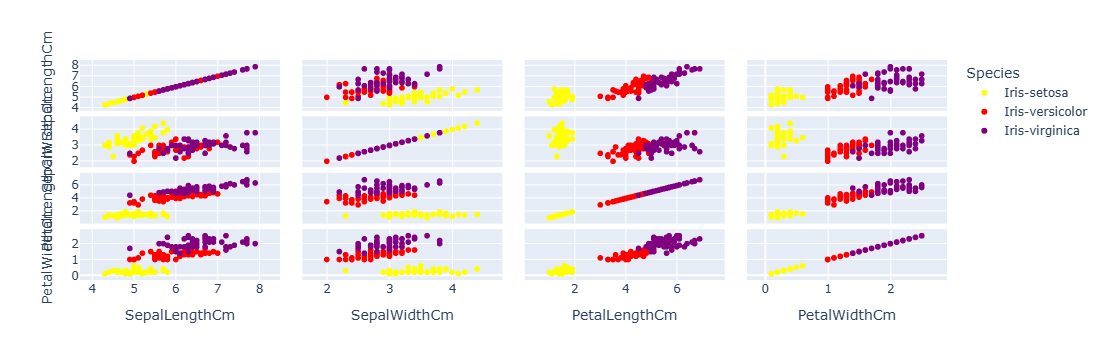

In [29]:
from plotly.express import scatter_matrix
from plotly.express import parallel_categories
from plotly.express import scatter_3d
scatter_matrix(df, dimensions=df.columns[:-1], color='Species',
               color_discrete_sequence=['yellow', 'red', 'purple'])

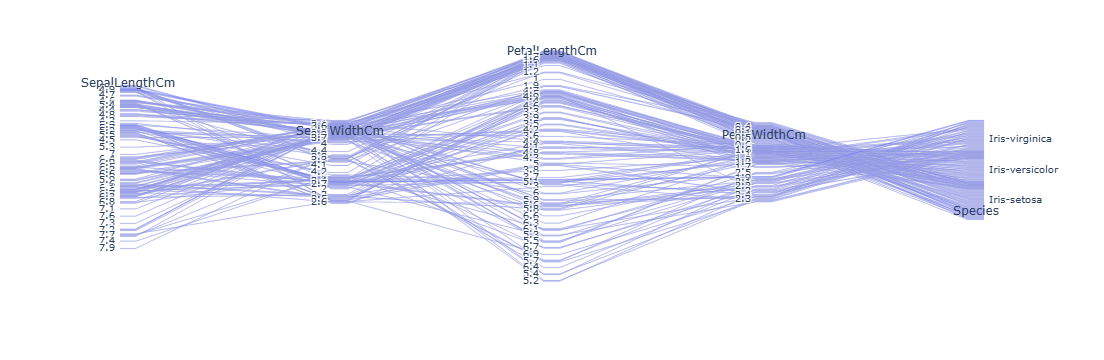

In [30]:
parallel_categories(df)

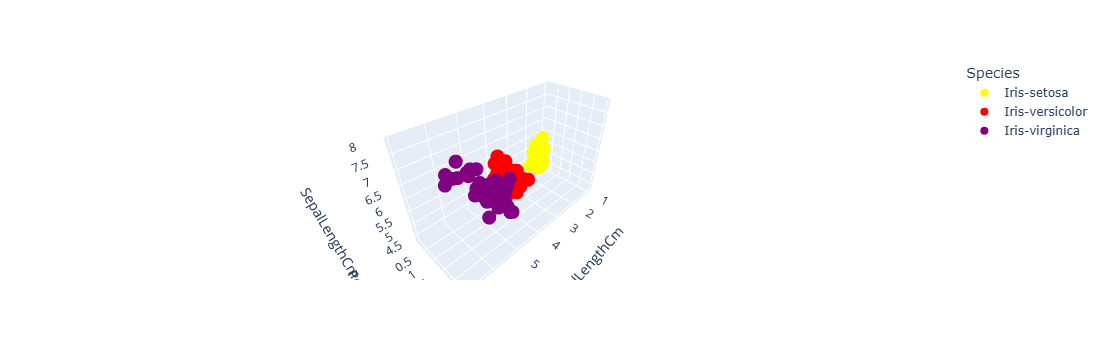

In [31]:
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalLengthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()

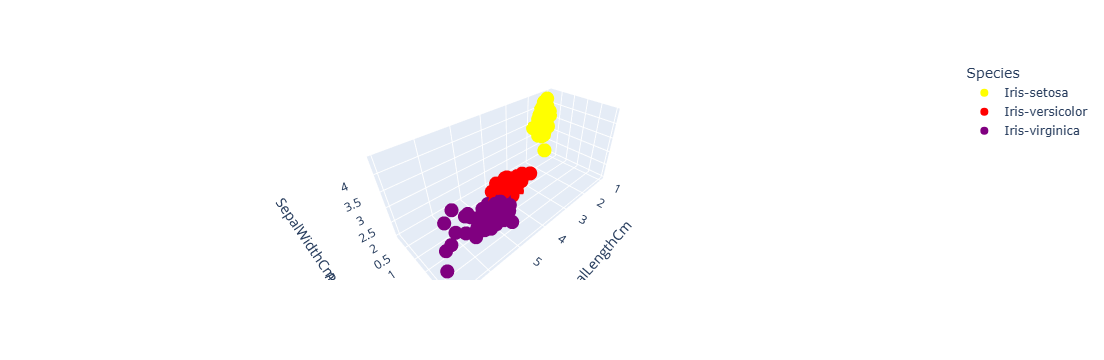

In [32]:
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalWidthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()

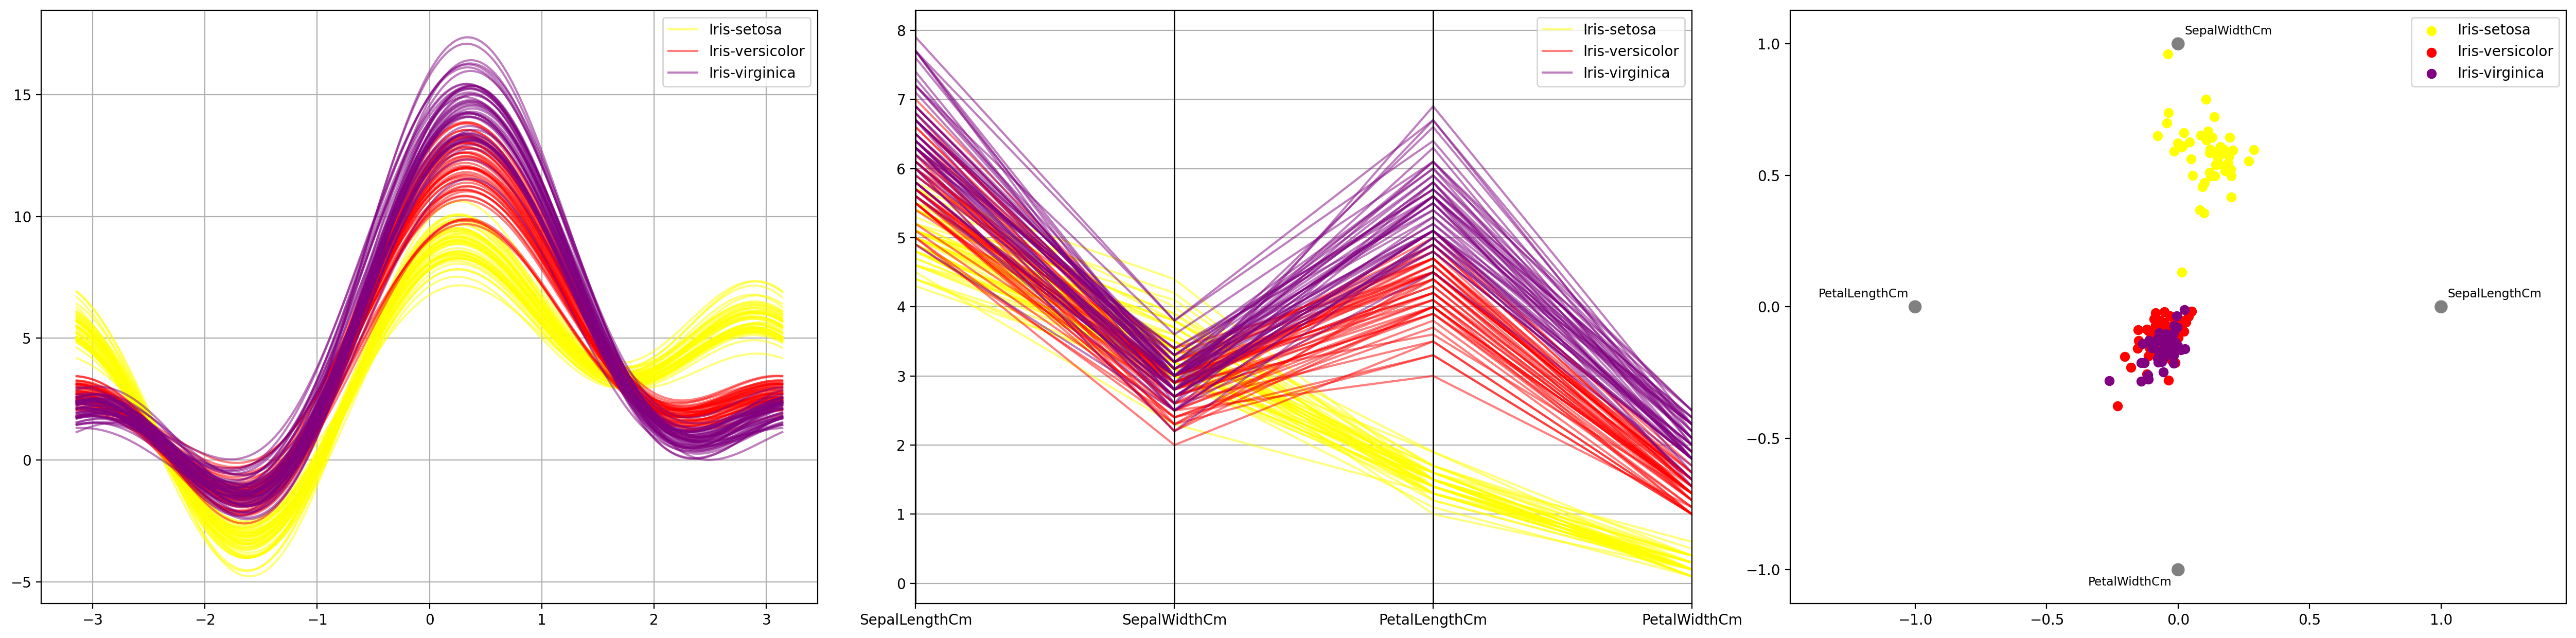

In [33]:
from pandas.plotting import andrews_curves
from pandas.plotting import radviz
def AV_plots():
    """
    Special thanks to Anand Venkataraman
    """
    # Imports for plots
    from pandas.plotting import andrews_curves
    from pandas.plotting import parallel_coordinates
    from pandas.plotting import radviz

    # plotting
    fig, ax = pl.subplots(1, 3, figsize=(25,6))
    
    # Andrews Curves
    andrews_curves(frame=df, class_column="Species",
                   color=['yellow','red','purple'],
                   alpha=0.5, ax=ax[0])
    
    # Parallel Coordinates
    parallel_coordinates(frame=df, class_column="Species",
                         color=['yellow','red','purple'],
                         alpha=0.5, ax=ax[1])
    # Radviz
    radviz(frame=df, class_column="Species",
           
           color=['yellow','red','purple'], ax=ax[2])
    pl.tight_layout(pad=0, w_pad=0.2, h_pad=0)
    pl.show()
    
AV_plots()

# iris flower EDA | ML beginner

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import scipy.stats as stats
#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('C:/Users/gptsorab/Downloads/preethi.n/irisflowerdataset.csv')
df.drop(columns=['Id'],inplace=True)

In [48]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [57]:
# Checking the number of rows and columns
#Data
num_train_rows, num_train_columns = df.shape
#Printing the number of rows and columns.
print("Iris Flower Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Iris Flower Data:
Number of Rows: 150
Number of Columns: 5



In [45]:
df_null = df.isnull().sum().sum()

print(f'Null Count in Data: {df_null}')

Null Count in Data: 0


In [46]:
data_duplicates = df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 3


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [60]:
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


In [61]:
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
The Value Count of Float Columns is : 4


In [62]:
def print_feature_stats(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        feature_data = df[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_count = feature_data.count()
        
        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print()
print_feature_stats(df)

Feature: SepalLengthCm
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Count: 150

Feature: SepalWidthCm
Mean: 3.05
Median: 3.00
Standard Deviation: 0.43
Count: 150

Feature: PetalLengthCm
Mean: 3.76
Median: 4.35
Standard Deviation: 1.76
Count: 150

Feature: PetalWidthCm
Mean: 1.20
Median: 1.30
Standard Deviation: 0.76
Count: 150



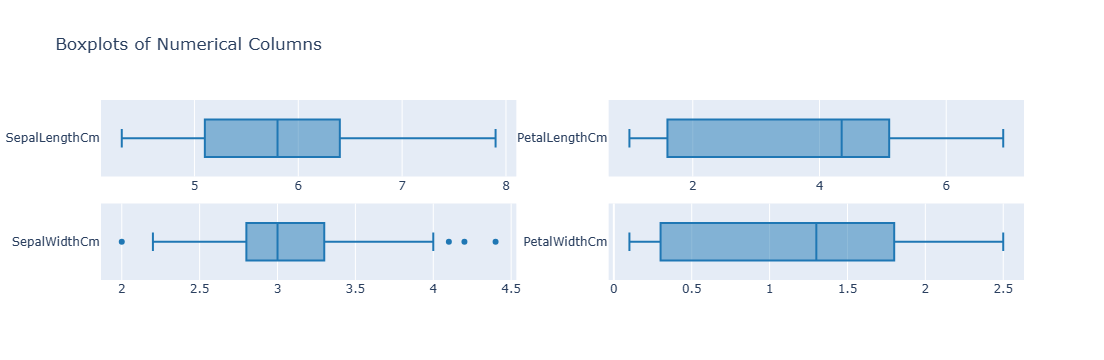

In [63]:
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate number of rows based on columns

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(numerical_features, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False,)

# Show the plot
fig.show()

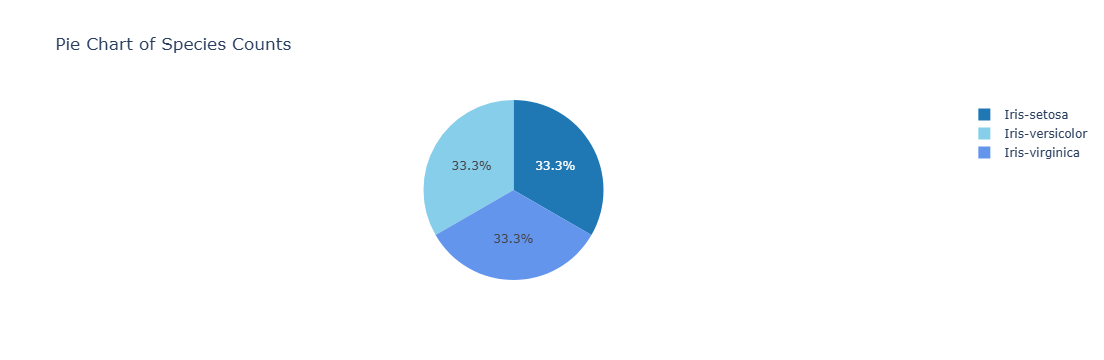

In [64]:
# Define custom colors
# custom_colors = ['#1f77b4', 'skyblue', 'lightblue']
custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']


# Create a pie chart with custom colors
fig_pie = px.pie(values=[50, 50, 50],
                 names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                 title='Pie Chart of Species Counts',
                 color_discrete_sequence=custom_colors)

# Show the pie chart
fig_pie.show()


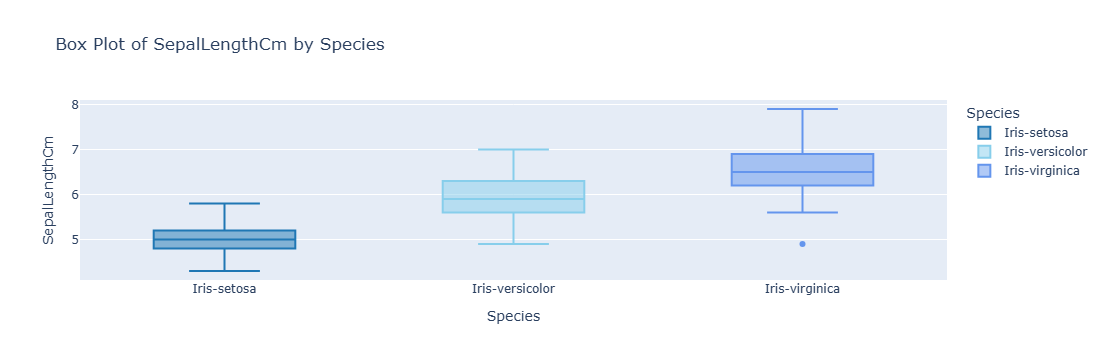

In [65]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalLengthCm", title="Box Plot of SepalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalLengthCm",)

# Show the box plot
fig_boxplot.show()

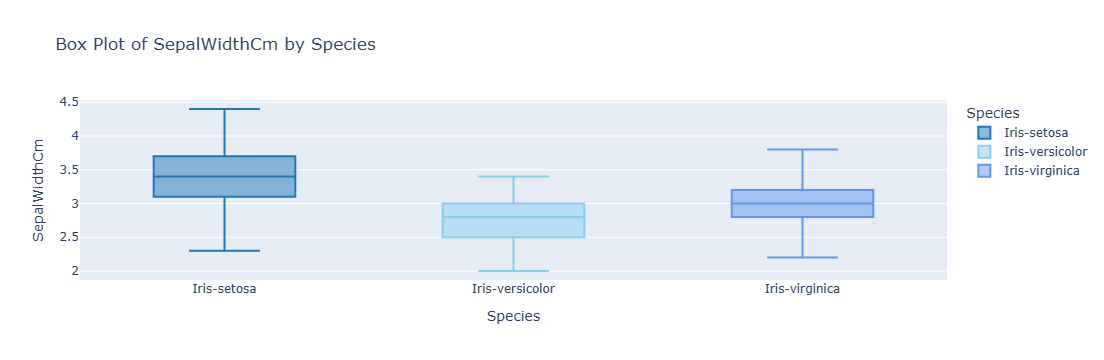

In [66]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalWidthCm", title="Box Plot of SepalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalWidthCm")

# Show the box plot
fig_boxplot.show()

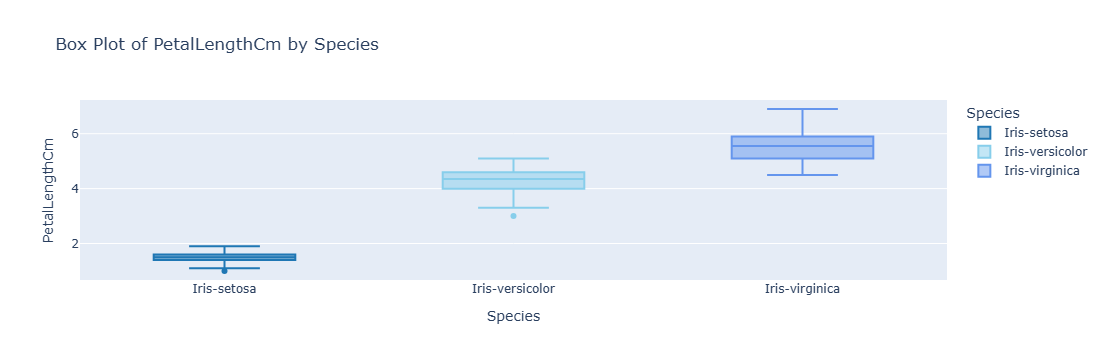

In [67]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalLengthCm", title="Box Plot of PetalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalLengthCm",)

# Show the box plot
fig_boxplot.show()

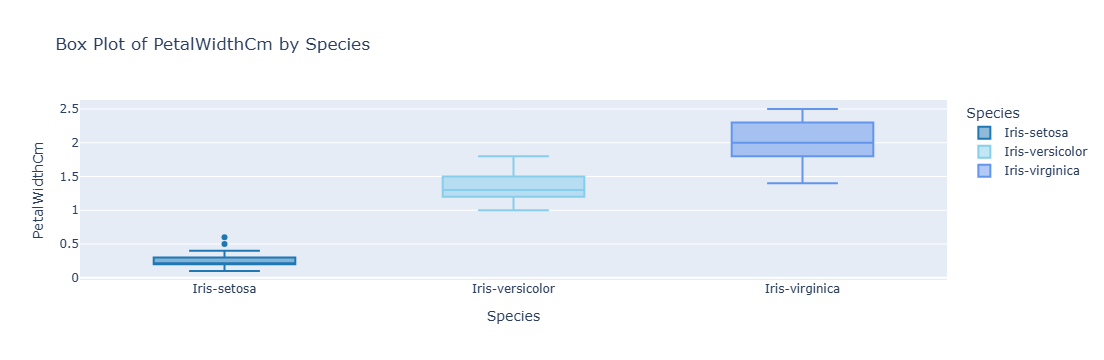

In [68]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalWidthCm", title="Box Plot of PetalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalWidthCm",)

# Show the box plot
fig_boxplot.show()


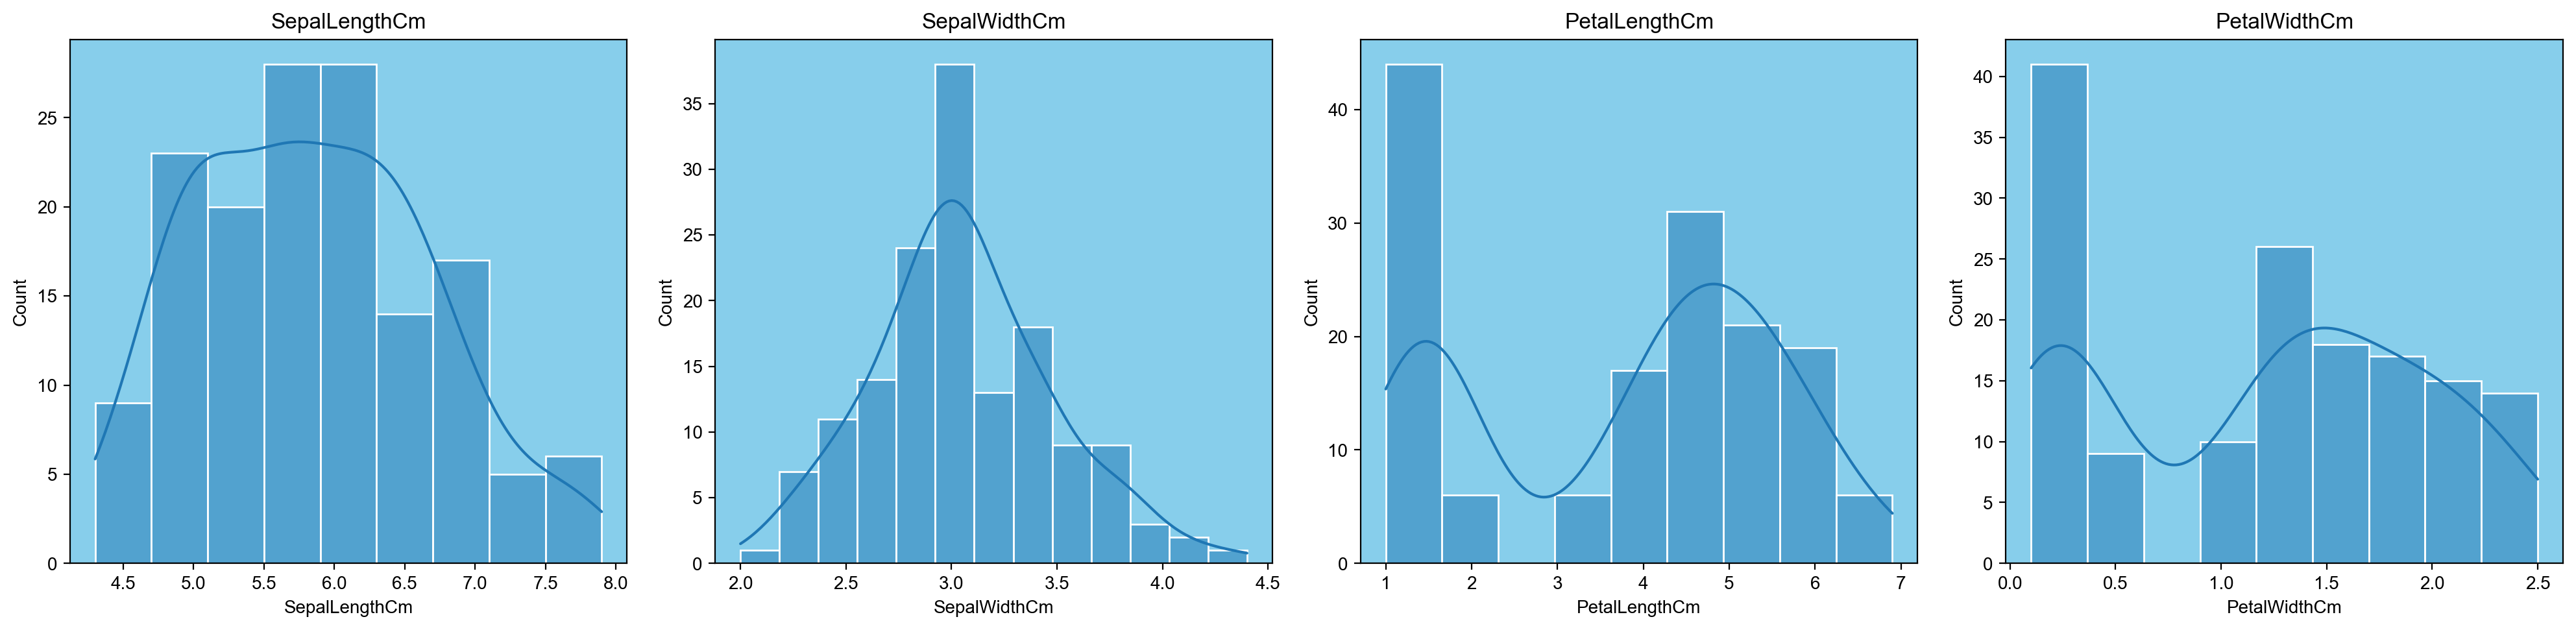

In [69]:
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 4)  # Adjust the number 4 based on how many plots you want per row
num_cols = min(num_features, 4)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

sns.set_theme(style="darkgrid")

# Loop through each numerical feature and create a distribution plot with custom bar color
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_facecolor('skyblue')  # Set background color to skyblue
# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [70]:
def quantile_transform(data,cols):
    # Transformer 
    qt = QuantileTransformer(output_distribution='normal')
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data
#Transform Data
df = quantile_transform(df,numeric_features) 

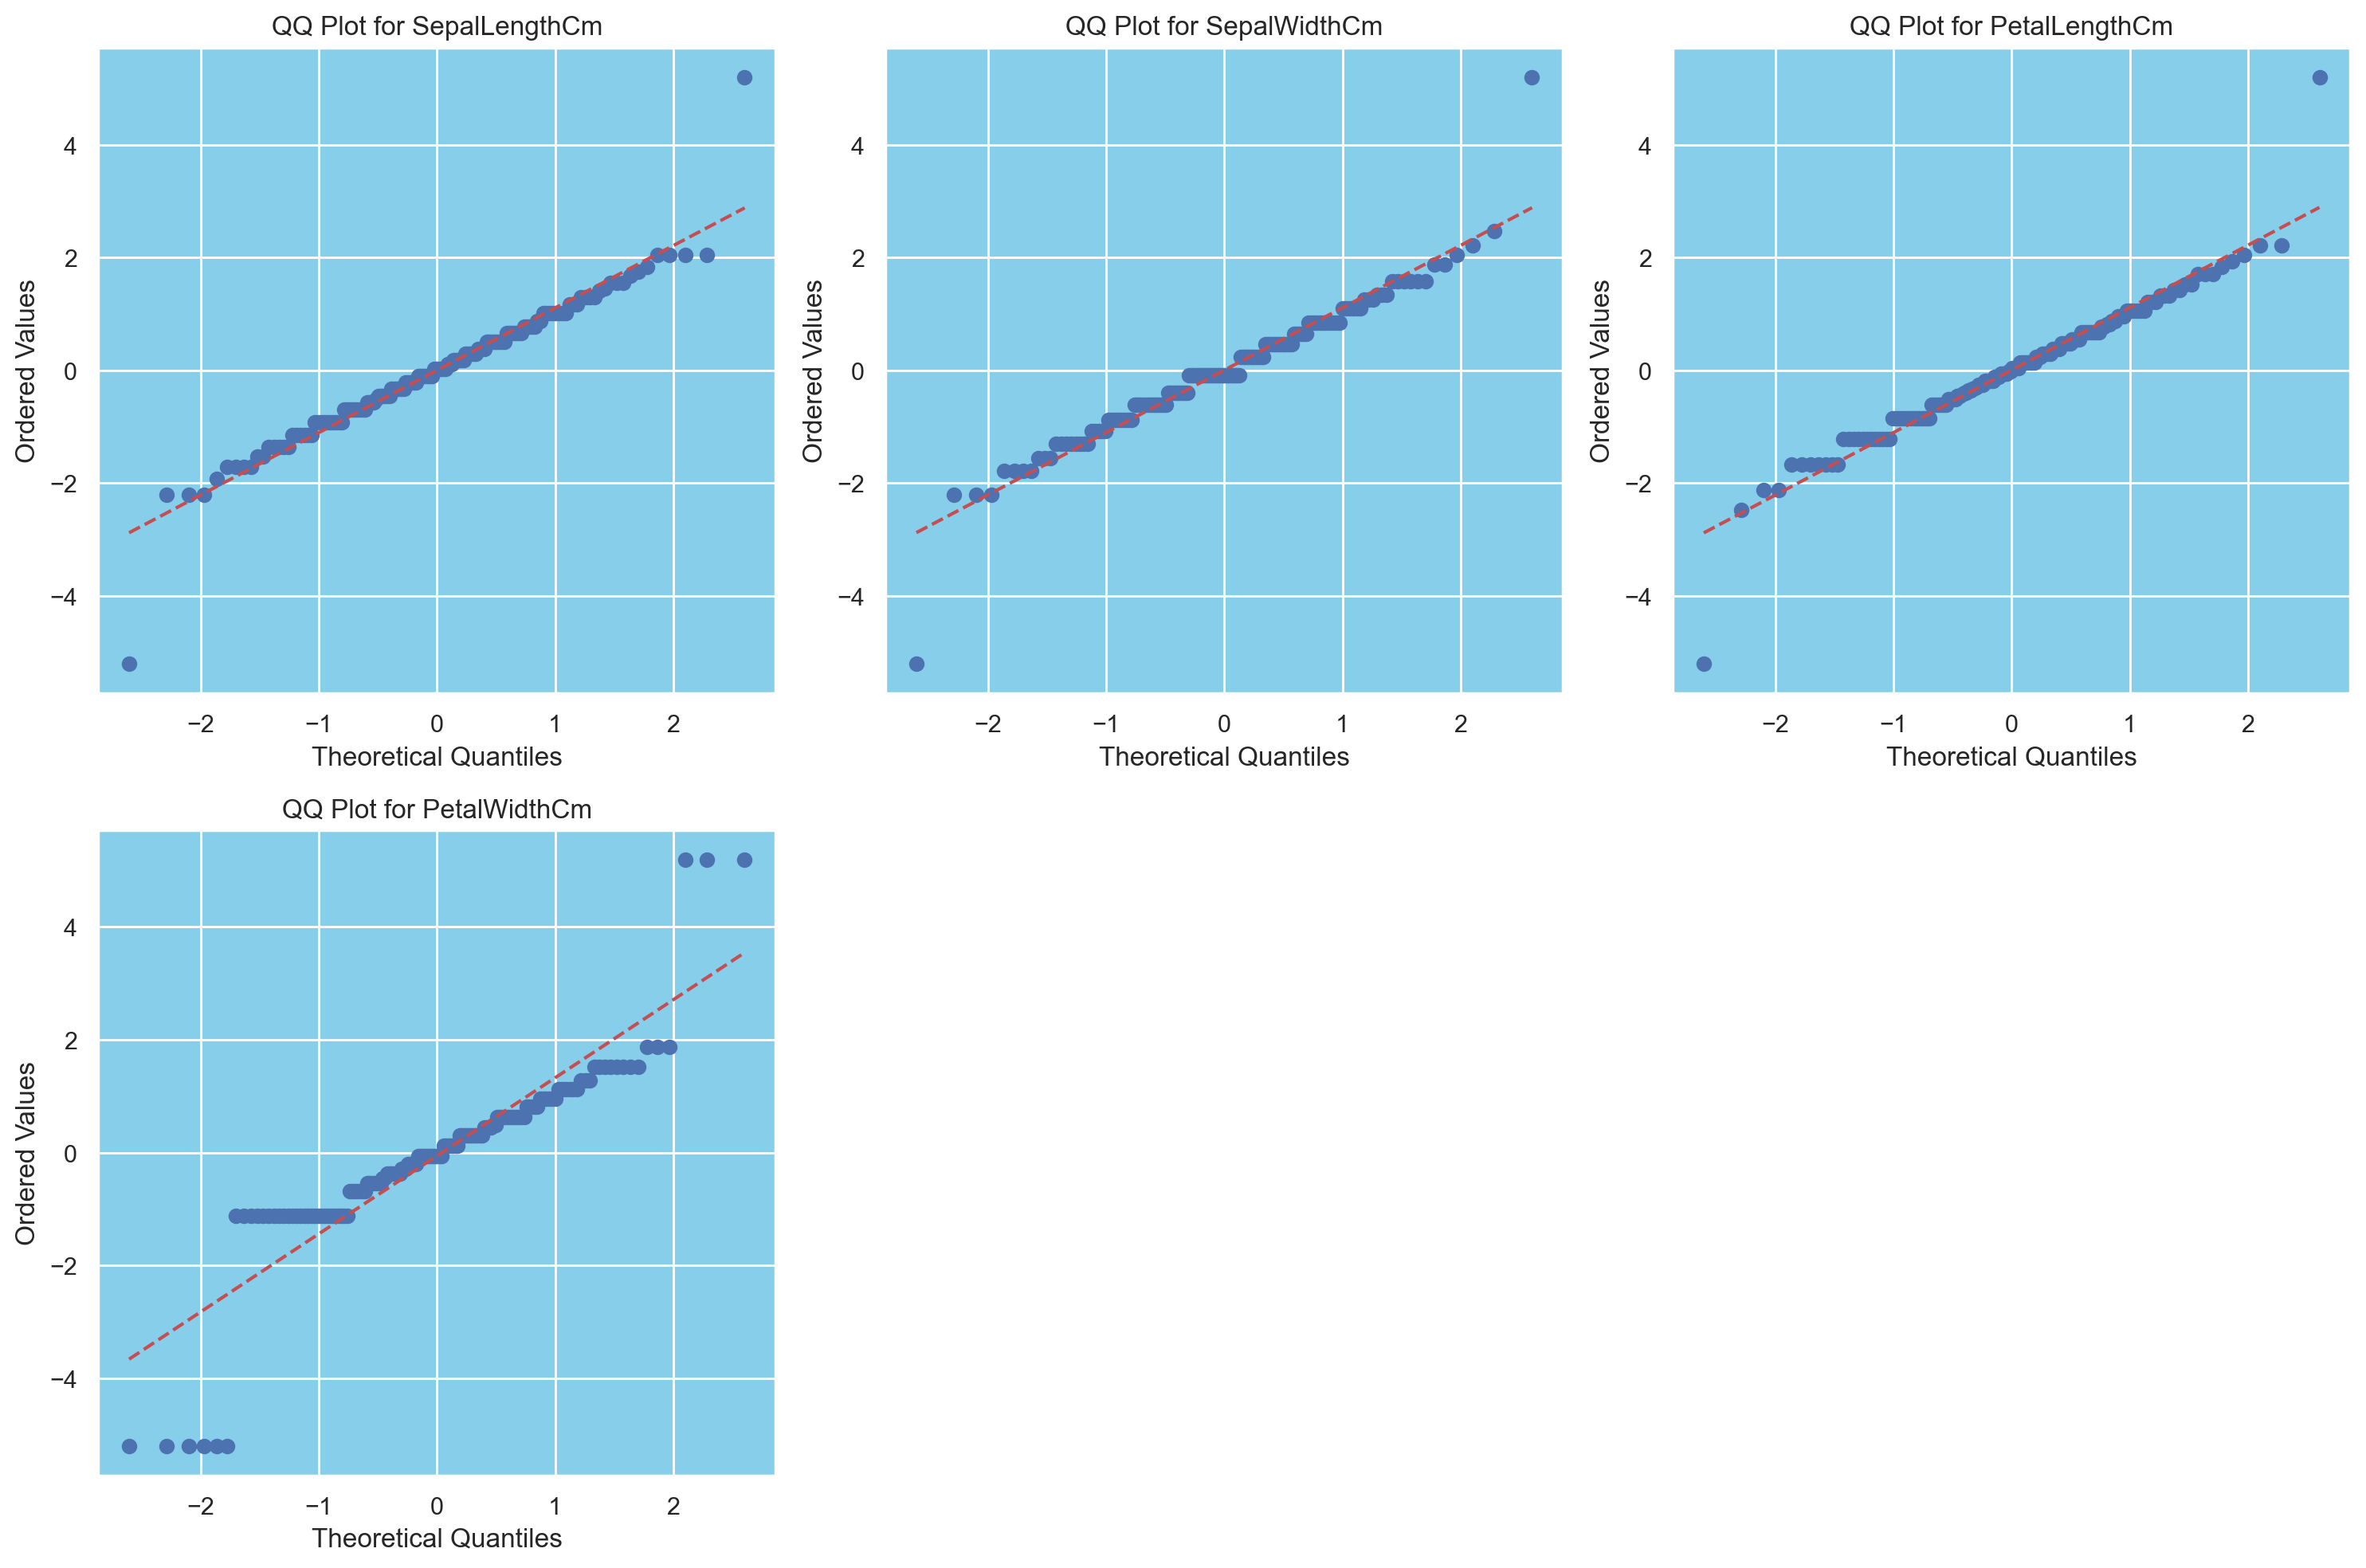

In [71]:
def plot_qq(df_qt, feature, ax):
    stats.probplot(df_qt[feature], dist="norm", plot=ax)
    ax.get_lines()[1].set_linestyle('--')
    ax.set_title(f"QQ Plot for {feature}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Ordered Values")

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_cols = 3  # Number of plots per row
num_rows = math.ceil(num_features / num_cols)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a QQ plot
for i, col in enumerate(numeric_features):
    plot_qq(df, col, axes[i])
    axes[i].set_facecolor('skyblue') 

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [72]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


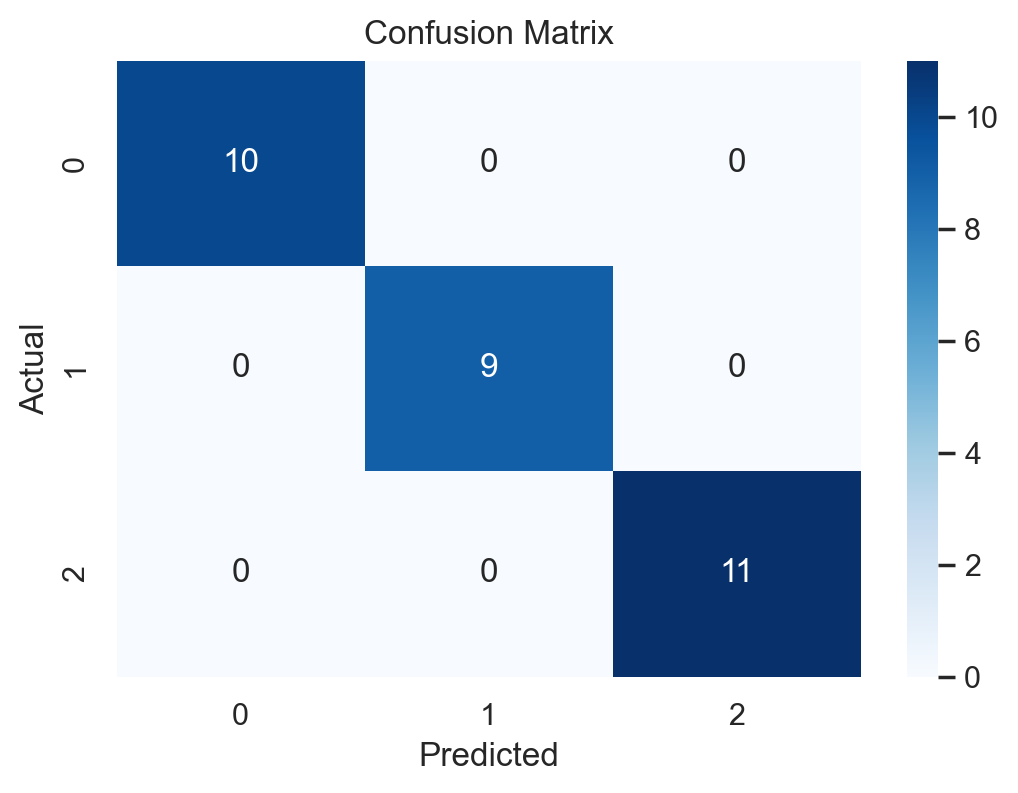

In [73]:
# Splitting the data into Features & Targets
X = df.drop(columns='Species', axis=1)
y = df['Species']

# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = evaluate_results(y_test,y_pred_svm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


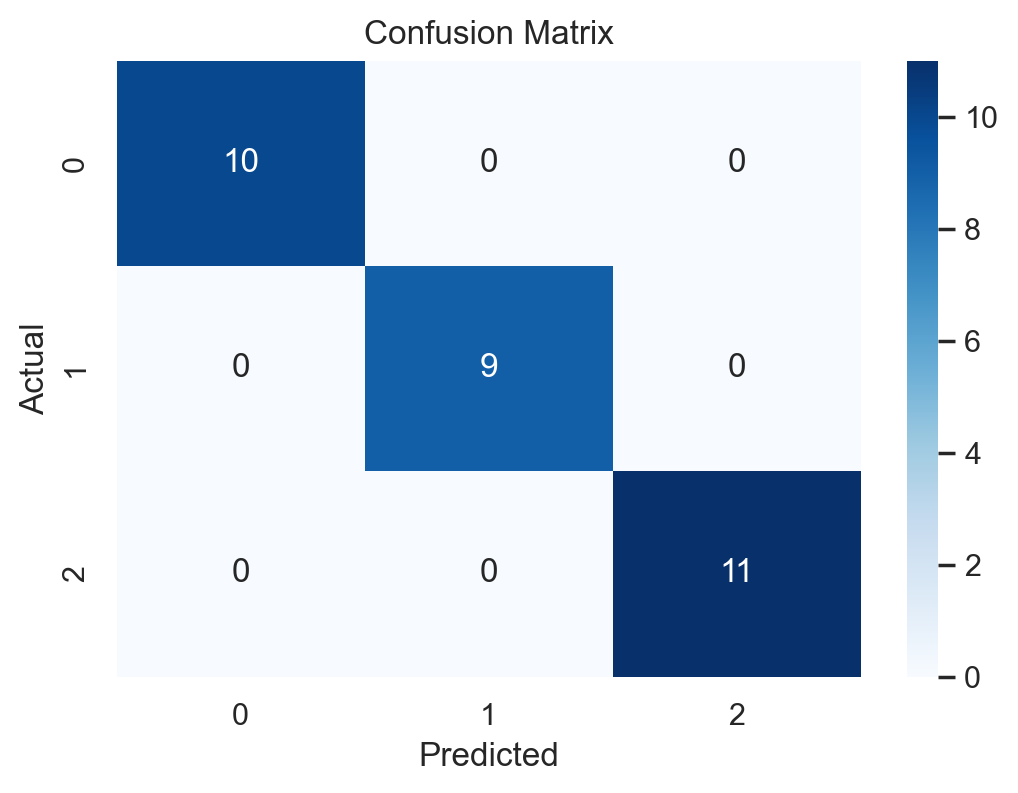

In [74]:
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

#Evaluate 
accuracy_knn = evaluate_results(y_test, y_pred_knn)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


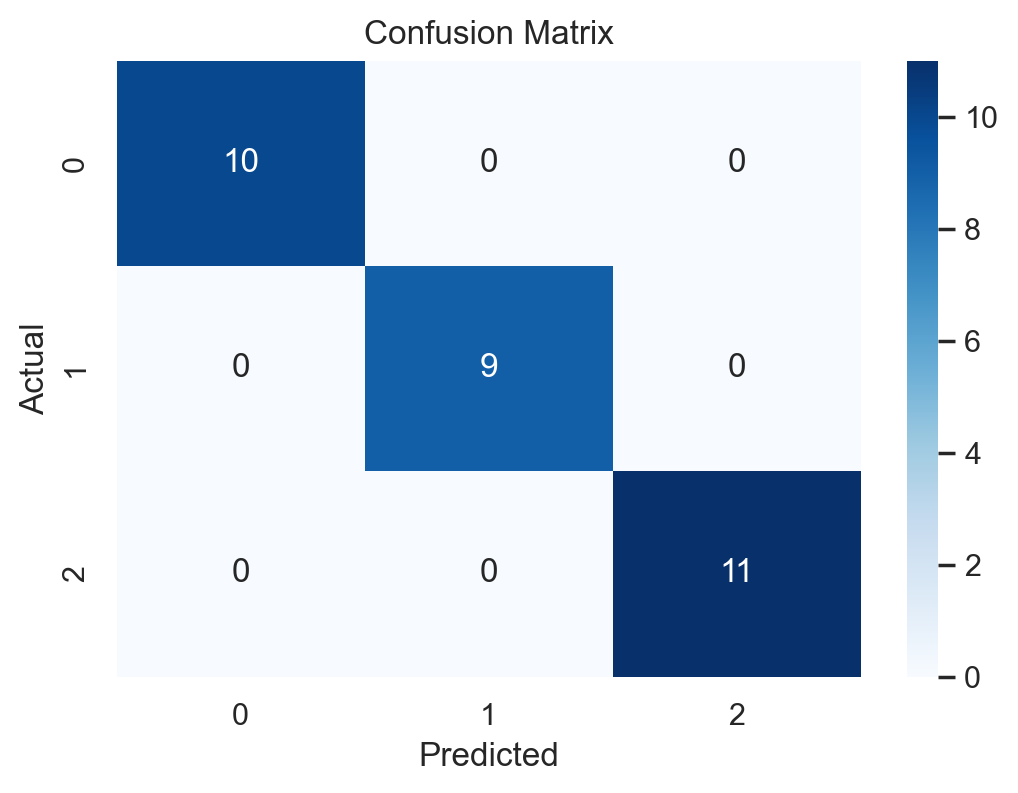

In [75]:
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = evaluate_results(y_test, y_pred_dt)

In [76]:
print('1. We have trained three models to evaluate their performance:')
print(f'- The SVM model achieved an accuracy of {accuracy_svm[0]:.2f}.')
print(f'- The KNN model achieved an accuracy of {accuracy_knn[0]:.2f}.')
print(f'- The Decision Tree model achieved an accuracy of {accuracy_dt[0]:.2f}.')
print(f'As we Know All The Models are Performing Well and giving Accuracy of 100%')

1. We have trained three models to evaluate their performance:
- The SVM model achieved an accuracy of 1.00.
- The KNN model achieved an accuracy of 1.00.
- The Decision Tree model achieved an accuracy of 1.00.
As we Know All The Models are Performing Well and giving Accuracy of 100%


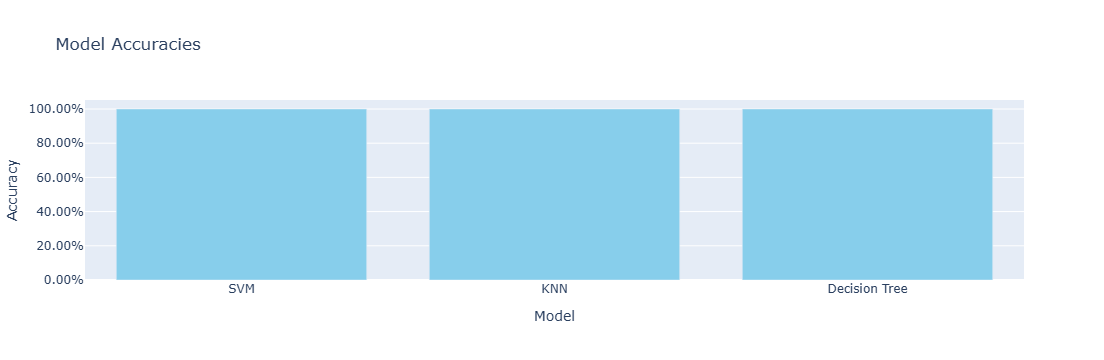

In [77]:
model_names = ['SVM', 'KNN', 'Decision Tree']
accuracies = [accuracy_svm[0], accuracy_knn[0], accuracy_dt[0]]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies, marker_color='skyblue')])
fig.update_layout(
                  title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis=dict(tickformat=".2%"))
fig.show()